In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=b9b7ff736ccb496578491317b54c6a9de8478d48bb43fbc748a541735a6ce76b
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
pip install transformers

     |████████████████████████████████| 3.8 MB 5.4 MB/s 
     |████████████████████████████████| 6.5 MB 35.9 MB/s 
     |████████████████████████████████| 596 kB 48.5 MB/s 
     |████████████████████████████████| 77 kB 7.1 MB/s 
     |████████████████████████████████| 895 kB 51.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/Bisa.ai/Week 6/clean_bpom.xlsx')
df1 = df1.rename(columns={'sentiment': 'Class', 'tweet': 'Tweet'})
def change(x):
  if(x=='negatif'):
    return 0
  if(x=='netral'):
    return 1
  if(x=='positif'):
    return 2
df1['Class'] = df1['Class'].apply(lambda x : change(x))
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          2232 non-null   int64 
 1   Tweet               2232 non-null   object
 2   Class               2232 non-null   int64 
 3   mood                2232 non-null   object
 4   content_tokenizing  2232 non-null   object
 5   content_stopwords   2232 non-null   object
 6   content_stemming    2232 non-null   object
 7   content_bersih      2229 non-null   object
dtypes: int64(2), object(6)
memory usage: 139.6+ KB


In [ ]:
df1 = df1.dropna()
df1 = df1.drop('mood', axis=1)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bisa.ai/Week 4/trainn (2).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          9813 non-null   int64  
 1   Tweet               9813 non-null   object 
 2   Class               9813 non-null   float64
 3   content_tokenizing  9813 non-null   object 
 4   content_stopwords   9813 non-null   object 
 5   content_stemming    9813 non-null   object 
 6   content_bersih      9813 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 536.8+ KB


In [ ]:
def change(x):
  if(x=='negatif'):
    return 0
  if(x=='netral'):
    return 1
  if(x=='positif'):
    return 2

In [ ]:
def change1(x):
  if(x==1):
    return 0
  if(x==2):
    return 1
  if(x==3):
    return 2

df['Class'] = df['Class'].apply(lambda x : change1(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          9813 non-null   int64 
 1   Tweet               9813 non-null   object
 2   Class               9813 non-null   int64 
 3   content_tokenizing  9813 non-null   object
 4   content_stopwords   9813 non-null   object
 5   content_stemming    9813 non-null   object
 6   content_bersih      9813 non-null   object
dtypes: int64(2), object(5)
memory usage: 536.8+ KB


In [ ]:
df = df.append(df1, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12042 entries, 0 to 12041
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          12042 non-null  int64 
 1   Tweet               12042 non-null  object
 2   Class               12042 non-null  int64 
 3   content_tokenizing  12042 non-null  object
 4   content_stopwords   12042 non-null  object
 5   content_stemming    12042 non-null  object
 6   content_bersih      12042 non-null  object
dtypes: int64(2), object(5)
memory usage: 658.7+ KB


In [ ]:
df3 = pd.read_excel('/content/drive/MyDrive/Bisa.ai/Week 6/clean_tambahan.xlsx')
df3 = df3.dropna()

df3['Class'] = df3['Class'].apply(lambda x : change(x))
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856 entries, 0 to 913
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          856 non-null    int64 
 1   Tweet               856 non-null    object
 2   Class               856 non-null    int64 
 3   content_tokenizing  856 non-null    object
 4   content_stopwords   856 non-null    object
 5   content_stemming    856 non-null    object
 6   content_bersih      856 non-null    object
dtypes: int64(2), object(5)
memory usage: 53.5+ KB


In [ ]:
df = df.append(df3, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12898 entries, 0 to 12897
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          12898 non-null  int64 
 1   Tweet               12898 non-null  object
 2   Class               12898 non-null  int64 
 3   content_tokenizing  12898 non-null  object
 4   content_stopwords   12898 non-null  object
 5   content_stemming    12898 non-null  object
 6   content_bersih      12898 non-null  object
dtypes: int64(2), object(5)
memory usage: 705.5+ KB


In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda')

  print('there are %d GPU(s) available.' % torch.cuda.device_count())

  print('we will use the GPU: ', torch.cuda.get_device_name(0))

else:
  print("No GPU available, using the CPU instead")
  device = torch.device("cpu")


there are 1 GPU(s) available.
we will use the GPU:  Tesla K80


In [ ]:
from transformers import DistilBertTokenizerFast, BertTokenizer
from transformers import TFDistilBertForSequenceClassification, TFDistilBertForTokenClassification

In [ ]:
df_test = pd.read_excel('/content/drive/MyDrive/Kuliah/data uji.xlsx')

,Unnamed: 0,Tweet,Class,content_tokenizing,content_stopwords,content_stemming,content_bersih
0,0,hari ini udh mulai ppkm yaa😣,2.0,"['hari', 'ini', 'udh', 'mulai', 'ppkm', 'yaa😣']","['udh', 'ppkm', 'yaa😣']","['udh', 'ppkm', 'yaa']",udh ppkm yaa
1,1,mohon info apakah pgs pasar turi selama ppkm b...,2.0,"['mohon', 'info', 'apakah', 'pgs', 'pasar', 't...","['mohon', 'info', 'pgs', 'pasar', 'turi', 'ppk...","['mohon', 'info', 'pgs', 'pasar', 'turi', 'ppk...",mohon info pgs pasar turi ppkm buka tutup teri...
2,2,di rumah aja soalnya lagi ppkm entah bakal nga...,2.0,"['di', 'rumah', 'aja', 'soalnya', 'lagi', 'ppk...","['rumah', 'aja', 'ppkm', 'ngapain']","['rumah', 'aja', 'ppkm', 'ngapain']",rumah aja ppkm ngapain
3,3,pangkal penanganan pandemi di indonesia yang t...,1.0,"['pangkal', 'penanganan', 'pandemi', 'di', 'in...","['pangkal', 'penanganan', 'pandemi', 'indonesi...","['pangkal', 'tangan', 'pandemi', 'indonesia', ...",pangkal tangan pandemi indonesia kes semrawut ...
4,4,ppkm mikro anjingggggggg,1.0,"['ppkm', 'mikro', 'anjingggggggg']","['ppkm', 'mikro', 'anjingggggggg']","['ppkm', 'mikro', 'anjingggggggg']",ppkm mikro anjingggggggg


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


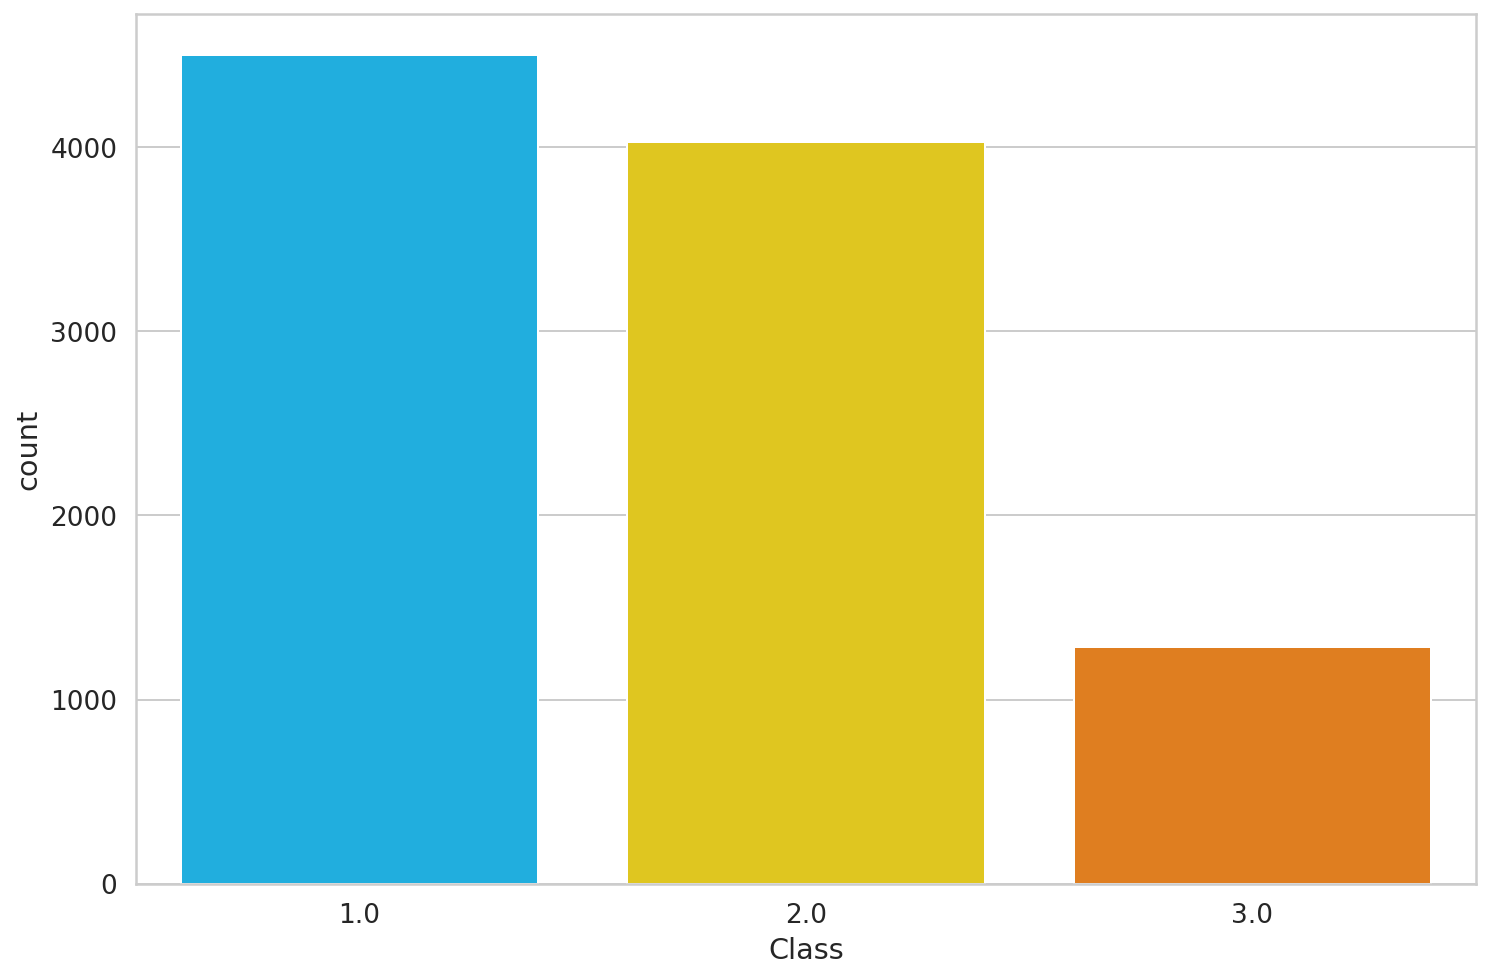

In [ ]:
sns.countplot(data=df, x='Class')

In [ ]:
df['Class'] = df['Class'].apply(lambda x : change(x))

In [ ]:
tokenizer = BertTokenizer.from_pretrained('indolem/indobert-base-uncased', do_lower_case=True)

In [ ]:
X = df['content_bersih']
y= df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tokenizer([X_train[1]], truncation=True,
                             padding=True,
            max_length=128)

{'input_ids': [[3, 9153, 11425, 12406, 944, 2820, 28470, 21657, 931, 9012, 8976, 5218, 3774, 4]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [ ]:
tweet = df['content_bersih'].values
sentiment = df['Class'].values

In [ ]:
df['content_bersih'][25]

'blum comeback stream ppkm sorry ulang '

In [ ]:
print (tokenizer.tokenize(tweet[25]))
print("Token IDS: ", tokenizer.convert_tokens_to_ids(tokenizer.tokenize(tweet[10])))

['blu', '##m', 'comeback', 'stream', 'ppk', '##m', 'sorry', 'ulang']
Token IDS:  [31615, 21657, 931, 6262, 2212, 20219, 3798, 2425, 24103, 10377, 2856, 8276, 936, 7974, 942, 1718]


In [ ]:
input_ids = []

for sent in tweet:
  encoded_sent = tokenizer.encode(
      sent,
      add_special_tokens = True
  )
  input_ids.append(encoded_sent)

print("Original: ", tweet[0])
print("Token IDs: ", input_ids[0])


Original:  udh ppkm yaa
Token IDs:  [3, 2727, 945, 21657, 931, 27677, 4]


In [ ]:
print("Max sentence length: ", max([len(sen) for sen in input_ids]))

Max sentence length:  89


In [ ]:
from keras.preprocessing.sequence import pad_sequences

MAX_LEN = 89

print("Padding/truncating all sentences to %d values" % MAX_LEN)
print('Padding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype='long', value=0, truncating='post', padding='post')

print("Done")

Padding/truncating all sentences to 89 values
Padding token: "[PAD]", ID: 0
Done


In [ ]:
input_ids[0]

array([    3,  2727,   945, 21657,   931, 27677,     4,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0])

In [ ]:
attention_mask = []

for sent in input_ids:
  att_mask = [int(token_id > 0) for token_id in sent]

  attention_mask.append(att_mask)

In [ ]:
from sklearn.model_selection import train_test_split

# train_input, test_input, train_labels, test_labels = train_test_split(input_ids,
#                                                                       sentiment,
#                                                                       random_state=42,
#                                                                       test_size=0.1)
# train_mask, test_mask, _, _ = train_test_split(attention_mask,
#                                                sentiment,
#                                                random_state=42,
#                                                test_size=0.1)

train_input, validation_input, train_labels, validation_labels = train_test_split(input_ids,
                                                                      sentiment,
                                                                      random_state=42,
                                                                      test_size=0.2)
train_mask, validation_mask, _, _ = train_test_split(attention_mask,
                                               sentiment,
                                               random_state=42,
                                               test_size=0.2)

In [ ]:
print("== Train ==")
print("Input: ", train_input.shape)
print("Label: ", train_labels.shape)
print("Mask: ", np.array(train_mask).shape)

print("\n== Validation ==")
print("Input: ", validation_input.shape)
print("Label: ", validation_labels.shape)
print("Mask: ", np.array(validation_mask).shape)

# print("\n== Test ==")
# print("Input: ", test_input.shape)
# print("Label: ", test_labels.shape)
# print("Mask: ", np.array(test_mask).shape)

== Train ==
Input:  (10318, 89)
Label:  (10318,)
Mask:  (10318, 89)

== Validation ==
Input:  (2580, 89)
Label:  (2580,)
Mask:  (2580, 89)


In [ ]:
train_input = torch.tensor(train_input)
train_labels = torch.tensor(train_labels)
train_mask = torch.tensor(train_mask)

validation_input = torch.tensor(validation_input)
validation_labels = torch.tensor(validation_labels)
validation_mask = torch.tensor(validation_mask)

# test_input = torch.tensor(test_input)
# test_labels = torch.tensor(test_labels)
# test_mask = torch.tensor(test_mask)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 128

train_data = TensorDataset(train_input, train_mask, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_input, validation_mask, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

# test_data = TensorDataset(test_input, test_mask, test_labels)
# test_sampler = SequentialSampler(test_data)
# test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig
model = BertForSequenceClassification.from_pretrained(
    "indolem/indobert-base-uncased",
    num_labels = 3,
    output_attentions = False,
    output_hidden_states = False
)
model.cuda()

Some weights of the model checkpoint at indolem/indobert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indober

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(31923, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
params = list(model.named_parameters())

print("The BERT model has {:} different named parameters.".format(len(params)))

print("==== Embedding Layer ====")
for p in params[0:5]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

print("==== First Transformers ====")
for p in params[5:21]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

print("==== Output Layer ====")
for p in params[-4:]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.
==== Embedding Layer ====
bert.embeddings.word_embeddings.weight                       (31923, 768)
bert.embeddings.position_embeddings.weight                     (512, 768)
bert.embeddings.token_type_embeddings.weight                     (2, 768)
bert.embeddings.LayerNorm.weight                                   (768,)
bert.embeddings.LayerNorm.bias                                     (768,)
==== First Transformers ====
bert.encoder.layer.0.attention.self.query.weight               (768, 768)
bert.encoder.layer.0.attention.self.query.bias                     (768,)
bert.encoder.layer.0.attention.self.key.weight                 (768, 768)
bert.encoder.layer.0.attention.self.key.bias                       (768,)
bert.encoder.layer.0.attention.self.value.weight               (768, 768)
bert.encoder.layer.0.attention.self.value.bias                     (768,)
bert.encoder.layer.0.attention.output.dense.weight             (768, 768)
bert.e

In [ ]:
optimizer = AdamW(
    model.parameters(),
    lr = 1e-5,
    eps = 1e-8,
    weight_decay = 1e-2
)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
from transformers import get_linear_schedule_with_warmup

epochs = 20

total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer,
                                             num_warmup_steps = 0,
                                             num_training_steps = total_steps)

In [ ]:
import numpy as np

def flat_accuracy(preds, labels):
  pred_flat = np.argmax(preds, axis=1).flatten()
  labels_flat = labels.flatten()
  return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
  elapsed_rounded = int(round(elapsed))
  return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:

import random

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
training_stats = []
loss_values = []

for epoch_i in range(0, epochs):

  # ===================================
  #              Training
  # ===================================

  print("======= Epoch {:} / {:} =======".format(epoch_i+1, epochs))
  print("Training...")

  t0 = time.time()

  total_loss = 0

  model.train()

  # For each batch of training data
  for step, batch in enumerate(train_dataloader):

    # Progress update every 40 batches
    if step % 40 == 0 and not step == 0:
      elapsed = format_time(time.time() - t0)

      print("Batch {:>5,} of {:>5,}.     Elapsed: {:}".format(step, len(train_dataloader), elapsed))

    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)

    model.zero_grad()

    outputs = model(b_input_ids,
                    attention_mask=b_input_mask,
                    labels=b_labels)

    loss = outputs[0]

    total_loss += loss.item()

    loss.backward()

    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    optimizer.step()

    scheduler.step()

  avg_train_loss = total_loss / len(train_dataloader)

  loss_values.append(avg_train_loss)

  print("   Average training loss: {0:.2f}".format(avg_train_loss))
  print("   Training epoch took: {:}".format(format_time(time.time() - t0)))

  # ===================================
  #             Validation
  # ===================================

  print("Running Validation...")

  t0 = time.time()

  model.eval()

  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0
  total_eval_loss = 0

  for batch in validation_dataloader:

    batch = tuple(t.to(device) for t in batch)

    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
      outputs = model(input_ids=b_input_ids,

                      attention_mask= b_input_mask,
                      )


    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    total_eval_loss += loss.item()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)

    eval_accuracy += tmp_eval_accuracy

    nb_eval_steps += 1


  avg_val_loss = total_eval_loss / len(validation_dataloader)
  print("   Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
  print("   Validation took: {:}".format(format_time(time.time() - t0)))
  print("  Validation Loss: {0:.2f}".format(avg_val_loss))
  training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'acc': eval_accuracy/nb_eval_steps
        }
    )
print("Training complete!")



======= Epoch 1 / 20 =======
Training...
Batch    40 of    81.     Elapsed: 0:02:06
Batch    80 of    81.     Elapsed: 0:04:13
   Average training loss: 0.97
   Training epoch took: 0:04:15
Running Validation...
   Accuracy: 0.59
   Validation took: 0:00:25
  Validation Loss: 0.87
======= Epoch 2 / 20 =======
Training...
Batch    40 of    81.     Elapsed: 0:02:07
Batch    80 of    81.     Elapsed: 0:04:13
   Average training loss: 0.85
   Training epoch took: 0:04:15
Running Validation...
   Accuracy: 0.64
   Validation took: 0:00:25
  Validation Loss: 0.82
======= Epoch 3 / 20 =======
Training...
Batch    40 of    81.     Elapsed: 0:02:07
Batch    80 of    81.     Elapsed: 0:04:13
   Average training loss: 0.78
   Training epoch took: 0:04:15
Running Validation...
   Accuracy: 0.65
   Validation took: 0:00:25
  Validation Loss: 0.92
======= Epoch 4 / 20 =======
Training...
Batch    40 of    81.     Elapsed: 0:02:06
Batch    80 of    81.     Elapsed: 0:04:13
   Average training loss: 0

In [ ]:
# Display floats with three decimal places.
pd.set_option('precision', 3)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,acc
epoch,,,
1,0.968,0.869,0.590
2,0.848,0.825,0.640
3,0.782,0.925,0.646
4,0.720,0.794,0.708
5,0.681,0.640,0.717
6,0.652,0.716,0.720
7,0.624,0.571,0.740
8,0.594,0.461,0.729
9,0.580,0.651,0.741


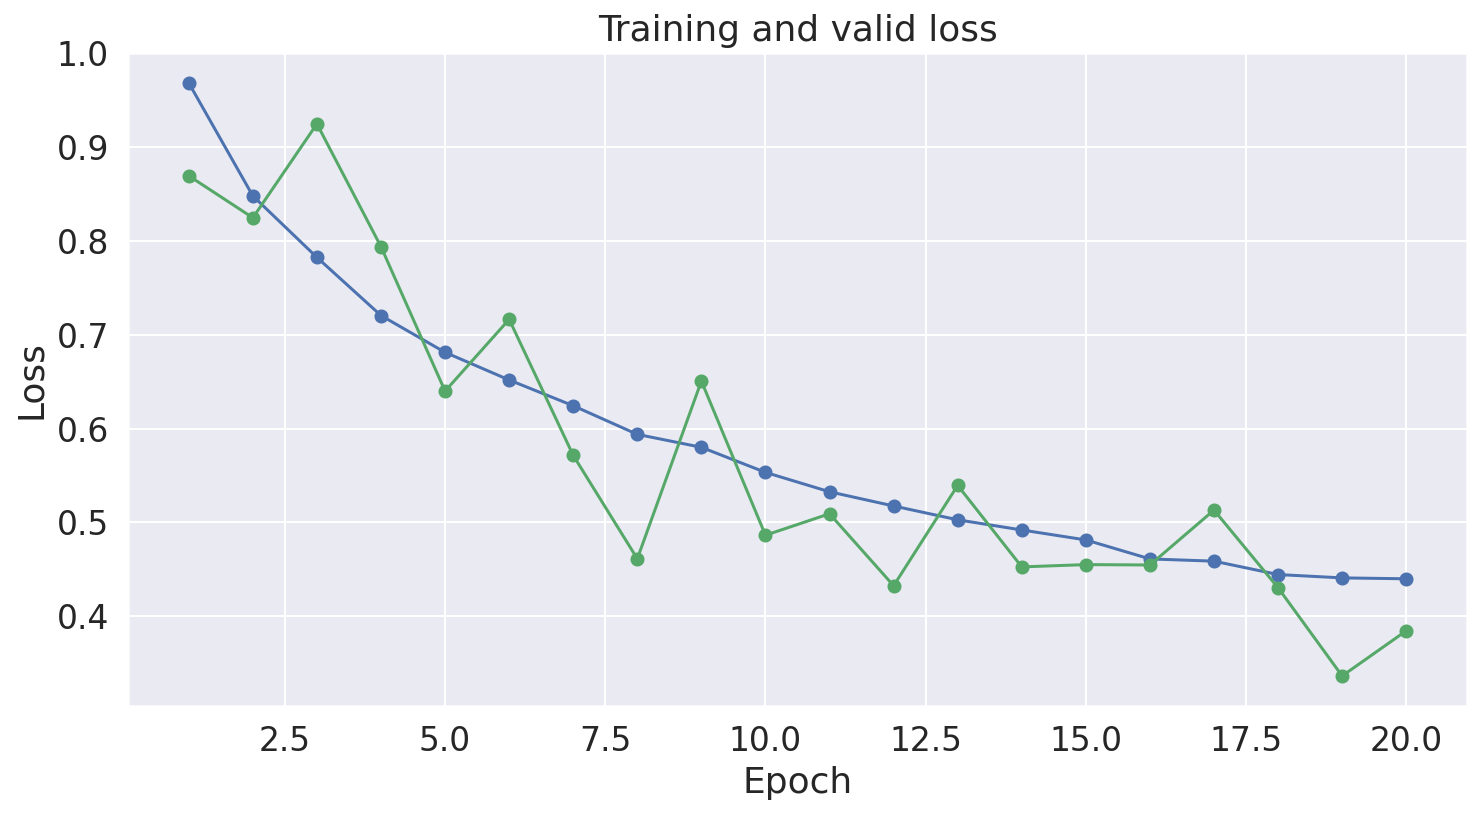

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")


plt.title("Training and valid loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [ ]:
model.eval()

prediction, true_labels = [], []

for batch in validation_dataloader:
  batch = tuple(t.to(device) for t in batch)

  b_input_ids, b_input_mask, b_labels = batch

  with torch.no_grad():
    outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask)

  logits = outputs[0]

  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  prediction.append(logits)
  true_labels.append(label_ids)

In [ ]:
from sklearn.metrics import matthews_corrcoef

flat_prediction = [item for sublist in prediction for item in sublist]
flat_prediction = np.argmax(flat_prediction, axis=1).flatten()

flat_true_labels = [item for sublist in true_labels for item in sublist]

mcc = matthews_corrcoef(flat_true_labels, flat_prediction)

print("MCC: %.3f" %mcc)

MCC: 0.605


In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(flat_true_labels, flat_prediction)

print("ACC: %.3f" %acc)

ACC: 0.754


In [ ]:
train_acc = df_stats['acc'].mean()

train_acc

0.7231436011904762

In [ ]:
train_acc = df_stats['acc'].mean()
train_loss = df_stats['Training Loss'].mean()
val_loss = df_stats['Valid. Loss'].mean()

In [ ]:
train_loss

0.5219718666326616

In [ ]:
val_loss

0.5323633283376694

In [ ]:
train_acc

0.7471446902252906

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

In [ ]:
print(confusion_matrix(flat_true_labels, flat_prediction))
print(classification_report(flat_true_labels, flat_prediction))
print('Recall: {}'.format(recall_score(flat_true_labels, flat_prediction,average='weighted')))
print('Precision: {}'.format(precision_score(flat_true_labels, flat_prediction,average='weighted')))
print('F1-Score: {}'.format(f1_score(flat_true_labels, flat_prediction,average='weighted')))

[[777 170  42]
 [215 879  91]
 [ 49  67 290]]
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       989
           1       0.79      0.74      0.76      1185
           2       0.69      0.71      0.70       406

    accuracy                           0.75      2580
   macro avg       0.74      0.75      0.74      2580
weighted avg       0.76      0.75      0.75      2580

Recall: 0.7542635658914729
Precision: 0.7557671502878206
F1-Score: 0.7544605300328032


In [ ]:
torch.save(model, '/content/drive/MyDrive/Bisa.ai/Week 6/modelfix.pt')


In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/Bisa.ai/Week 6/modelfix.pth')

In [ ]:
X = df_test['Tweet']
y= df_test['Class']
tokenizer([X[1]], truncation=True,
                             padding=True,
            max_length=128)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2227: UserWarning: `max_length` is ignored when `padding`=`True`.
  warnings.warn("`max_length` is ignored when `padding`=`True`.")


{'input_ids': [[3, 13760, 1646, 952, 1497, 1560, 26518, 31, 17, 6, 10047, 1573, 21657, 931, 10713, 2198, 7275, 6, 17, 6, 6878, 18, 52, 5311, 7270, 18596, 20427, 10713, 6, 17, 6, 15089, 3724, 6988, 12959, 5311, 2057, 952, 3482, 9988, 3745, 6, 17, 6, 6008, 7288, 1542, 3594, 1718, 2493, 15629, 6, 2068, 1684, 7783, 1497, 26518, 6, 3826, 944, 16, 14274, 3651, 6081, 16, 3069, 952, 1476, 18883, 1500, 4848, 6, 4]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [ ]:
tweet_test = df_test['Tweet'].values


In [ ]:
df_test['Class'].

In [ ]:
print(input_ids.shape)

torch.Size([200, 89])


In [ ]:


# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in tweet_test:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 89,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])



# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
# labels = torch.tensor(sentiment_test)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
prediction_data = TensorDataset(input_ids, attention_masks)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)
model.eval()

# Tracking variables
predictions , true_labels = [], []

# Predict
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask = batch

  # Telling the model not to compute or store gradients, saving memory and
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None,
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

    DONE.


In [ ]:
flat_prediction = [item for sublist in predictions for item in sublist]
flat_prediction = np.argmax(flat_prediction, axis=1).flatten()

In [ ]:
flat_prediction

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 2, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1,
       2, 1])

In [ ]:
df_test['Class']=flat_prediction

In [ ]:
def change(x):
  if(x==0):
    return 1
  if(x==1):
    return 2
  if(x==2):
    return 3

df_test['Class'] = df_test['Class'].apply(lambda x : change(x))
df_test['Class']

0      1
1      1
2      2
3      2
4      2
      ..
195    3
196    2
197    2
198    3
199    2
Name: Class, Length: 200, dtype: int64

In [ ]:
df_test.to_excel('data_uji.xlsx',index=False)

In [ ]:
true_labels

[array([0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]),
 array([0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]),
 array([0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]),
 array([0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0])]